In [1]:
import os
import random
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

DATA_DIR = Path("../data")
MODELS_DIR = Path("../models")
TRAIN_IMG_DIR = DATA_DIR / "train_images"
TRAIN_CSV_PATH = DATA_DIR / "train.csv"

# Ánh xạ nhãn sang Tiếng Việt
LABEL_MAP = {
    "bacterial_leaf_blight": "Bạc lá (Vi khuẩn)",
    "bacterial_leaf_streak": "Đốm sọc (Vi khuẩn)",
    "bacterial_panicle_blight": "Lép hạt (Vi khuẩn)",
    "blast": "Đạo ôn",
    "brown_spot": "Đốm nâu",
    "dead_heart": "Sâu đục thân",
    "downy_mildew": "Sương mai",
    "hispa": "Bọ gai",
    "normal": "Bình thường",
    "tungro": "Tungro (Virus)",
}


In [2]:
# 1. TẢI DỮ LIỆU

df = pd.read_csv(TRAIN_CSV_PATH)
df["label_vi"] = df["label"].map(LABEL_MAP).fillna(df["label"])

print("Đã tải train.csv với kích thước:", df.shape)
df.head()


Đã tải train.csv với kích thước: (10407, 5)


,image_id,label,variety,age,label_vi
0,100330.jpg,bacterial_leaf_blight,ADT45,45,Bạc lá (Vi khuẩn)
1,100365.jpg,bacterial_leaf_blight,ADT45,45,Bạc lá (Vi khuẩn)
2,100382.jpg,bacterial_leaf_blight,ADT45,45,Bạc lá (Vi khuẩn)
3,100632.jpg,bacterial_leaf_blight,ADT45,45,Bạc lá (Vi khuẩn)
4,101918.jpg,bacterial_leaf_blight,ADT45,45,Bạc lá (Vi khuẩn)


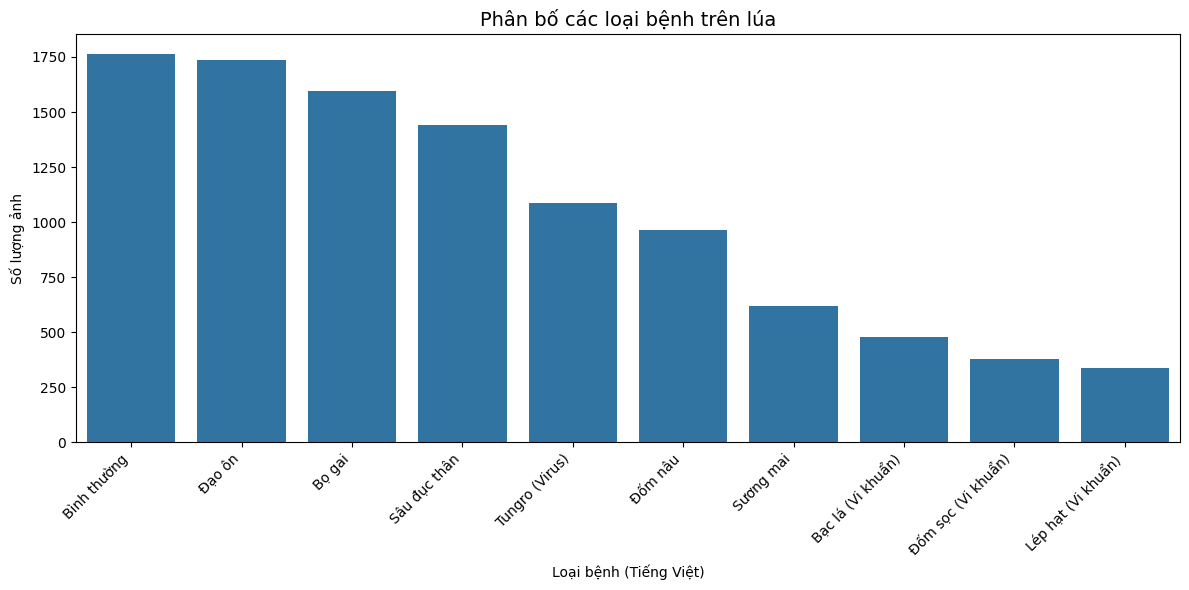

label_vi
Bình thường           1764
Đạo ôn                1738
Bọ gai                1594
Sâu đục thân          1442
Tungro (Virus)        1088
Đốm nâu                965
Sương mai              620
Bạc lá (Vi khuẩn)      479
Đốm sọc (Vi khuẩn)     380
Lép hạt (Vi khuẩn)     337
Name: count, dtype: int64

In [3]:
# 2. PHÂN BỐ NHÃN BỆNH (TIẾNG VIỆT)

label_counts = df["label_vi"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Phân bố các loại bệnh trên lúa", fontsize=14)
plt.xlabel("Loại bệnh (Tiếng Việt)")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

label_counts


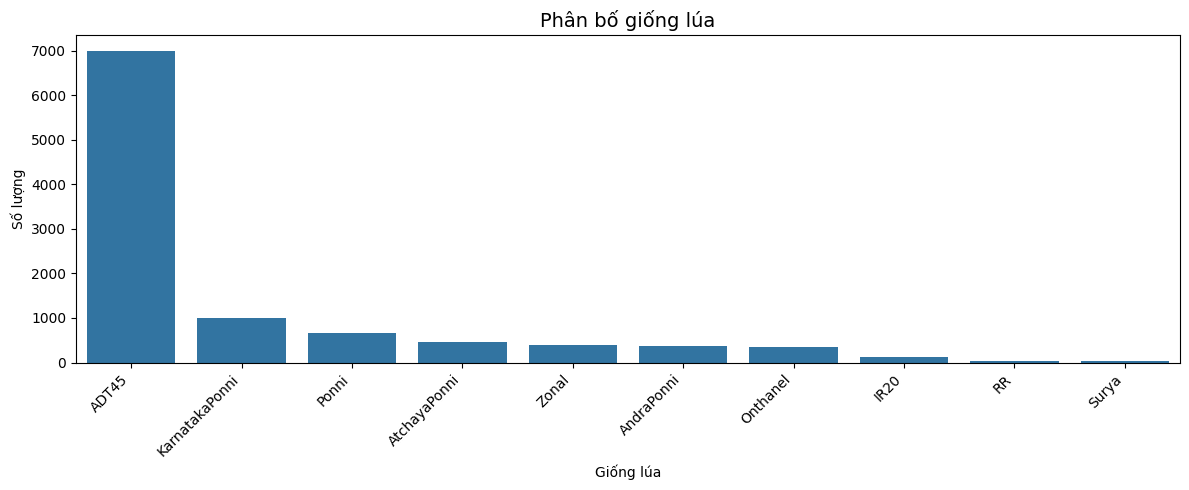

In [4]:
# 3. PHÂN BỐ GIỐNG LÚA

variety_order = df["variety"].value_counts().index

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="variety", order=variety_order)
plt.title("Phân bố giống lúa", fontsize=14)
plt.xlabel("Giống lúa")
plt.ylabel("Số lượng")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


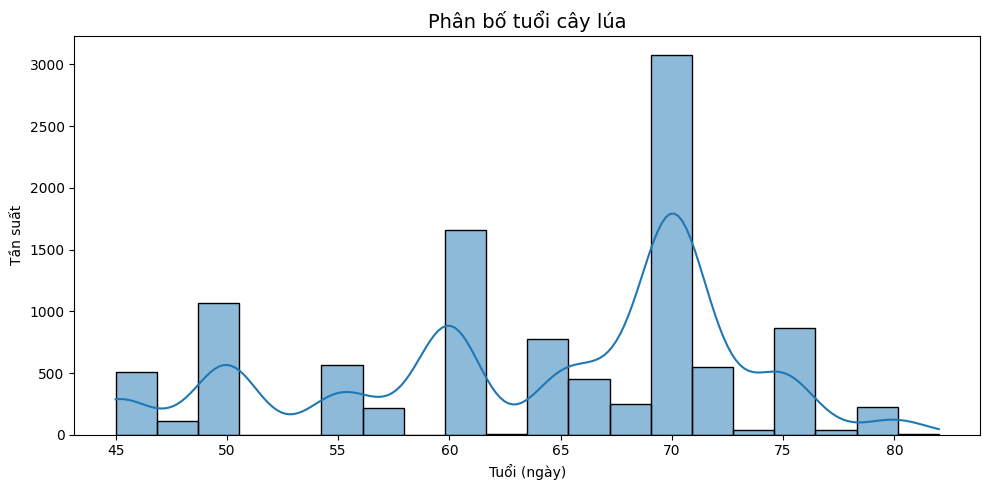

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

In [5]:
# 4. PHÂN BỐ TUỔI CÂY LÚA

plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Phân bố tuổi cây lúa", fontsize=14)
plt.xlabel("Tuổi (ngày)")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

df["age"].describe()


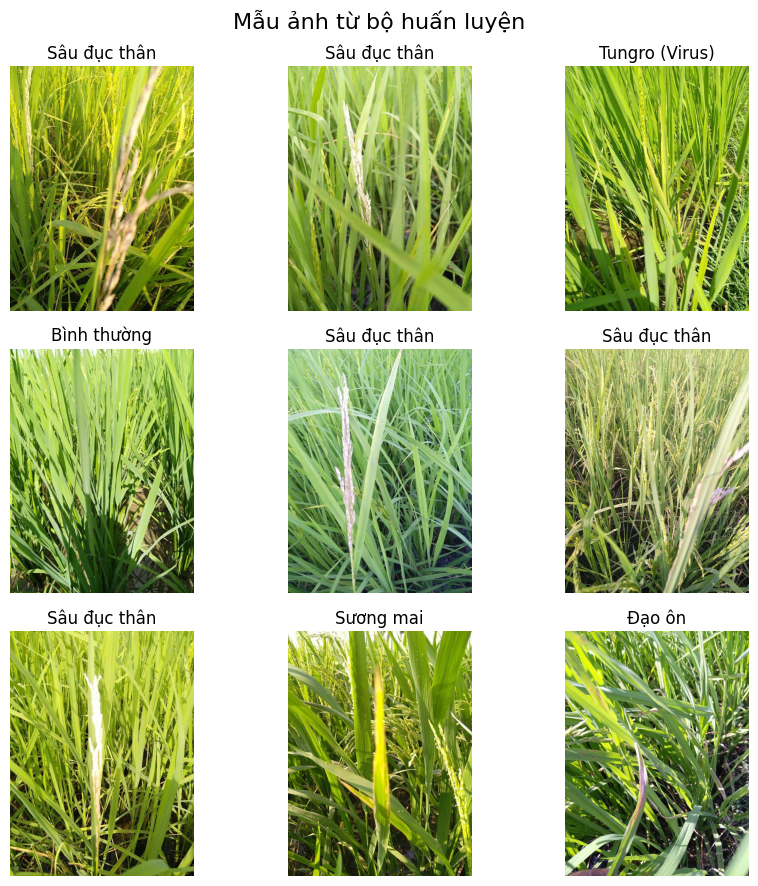

In [6]:
# 5. HIỂN THỊ MẪU ẢNH (3x3)

sample_df = df.sample(9, random_state=SEED)

plt.figure(figsize=(9, 9))

for i, (_, row) in enumerate(sample_df.iterrows()):
    img_path = TRAIN_IMG_DIR / row["label"] / row["image_id"]
    with Image.open(img_path) as img:
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(row["label_vi"])
        plt.axis("off")

plt.suptitle("Mẫu ảnh từ bộ huấn luyện", fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
# 5. IMAGE SIZE ANALYSIS

image_sizes = []

sample_images = df.sample(200, random_state=SEED)

for _, row in sample_images.iterrows():
    img_path = os.path.join(
        TRAIN_IMG_DIR,
        row["label"],
        row["image_id"]
    )
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

sizes_df = pd.DataFrame(image_sizes, columns=["Chiều rộng", "Chiều cao"])

print("Kích thước ảnh trung bình:")
print(sizes_df.mean())

print("\nThống kê kích thước ảnh:")
sizes_df.describe()


Kích thước ảnh trung bình:
Chiều rộng    480.0
Chiều cao     640.0
dtype: float64

Thống kê kích thước ảnh:


,Chiều rộng,Chiều cao
count,200.0,200.0
mean,480.0,640.0
std,0.0,0.0
min,480.0,640.0
25%,480.0,640.0
50%,480.0,640.0
75%,480.0,640.0
max,480.0,640.0
